In [36]:
#Import necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files

In [37]:
#Load the dataset

df = pd.read_csv("/content/news_articles.csv")

In [28]:
 #Display basic info

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())

First 5 rows of the dataset:
   word_count  has_keywords  read_time  category
0         142             0          3      tech
1        1043             0          6  business
2         442             1         12    sports
3        1449             1         13      tech
4        1937             1         10      tech

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   word_count    100 non-null    int64 
 1   has_keywords  100 non-null    int64 
 2   read_time     100 non-null    int64 
 3   category      100 non-null    object
dtypes: int64(3), object(1)
memory usage: 3.3+ KB
None


In [29]:
#Prepare features and target

X = df[['word_count', 'has_keywords', 'read_time']]
y = df['category']


In [31]:
#Split into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
#Train the classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
 #Make predictions

y_pred = model.predict(X_test)

In [35]:
#Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Accuracy: 0.4000

Classification Report:
              precision    recall  f1-score   support

    business       0.20      0.20      0.20         5
      sports       0.57      0.57      0.57         7
        tech       0.38      0.38      0.38         8

    accuracy                           0.40        20
   macro avg       0.38      0.38      0.38        20
weighted avg       0.40      0.40      0.40        20



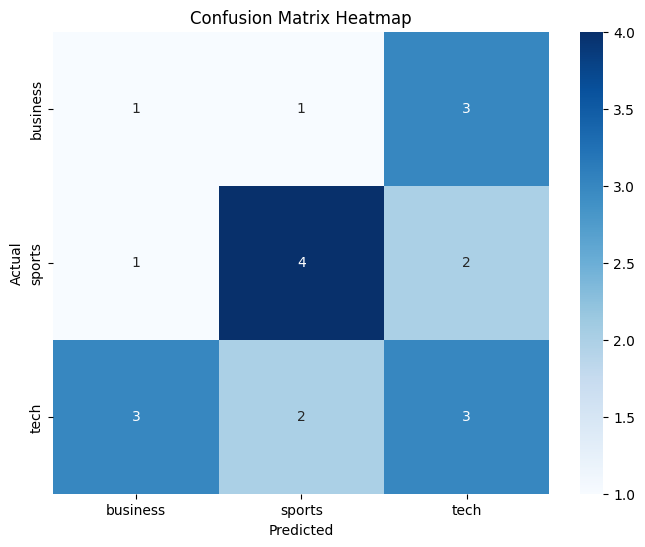

In [39]:
 #Confusion matrix and heatmap

cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['category'].unique())

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [41]:
# features for clustering
X_clust = df[['word_count', 'has_keywords', 'read_time']]


In [42]:
#Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clust)


In [43]:
#Elbow method to determine optimal clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


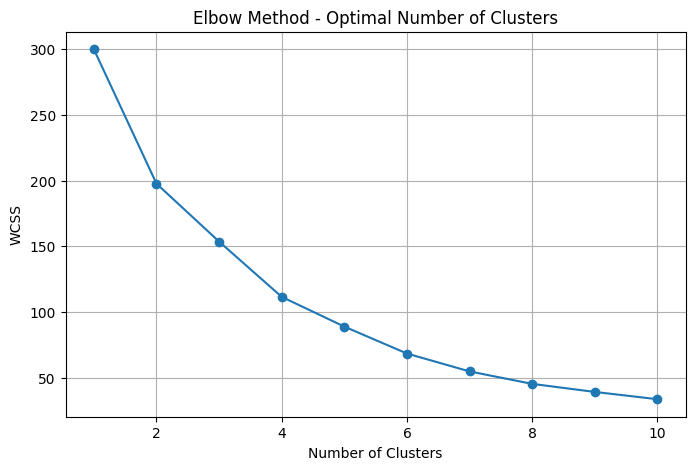

In [44]:
#Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [48]:
# Fit KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [49]:
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]


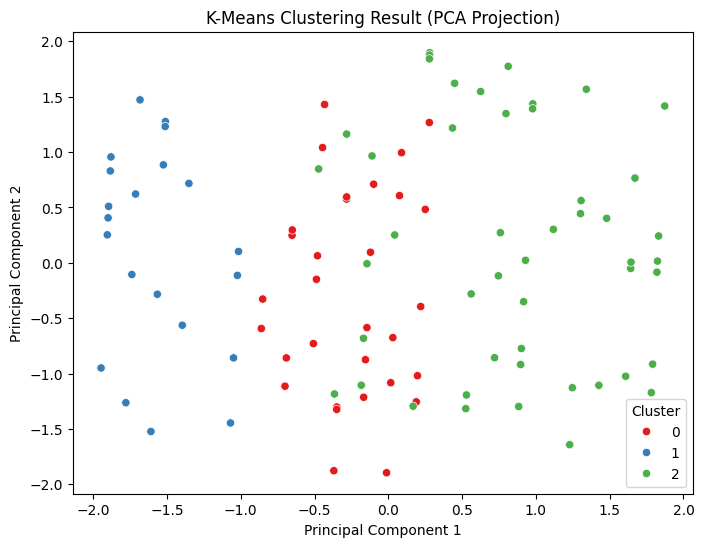

In [50]:
# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('K-Means Clustering Result (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
